In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import zipfile
import os
from pickle import dump,load
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
csv_files = os.listdir("C:/Users/HP/Desktop/iddaa_global/data_sets/")[::-1]
data_sets= []
for files in csv_files:
    data = pd.read_csv("C:/Users/HP/Desktop/iddaa_global/data_sets/{}".format(files))
    eliminated_weeks = len(data["HomeTeam"].unique())//2
    data_sets.append(data[eliminated_weeks*3: ])
final_data_set = pd.concat(data_sets, axis = 0).reset_index().drop(labels = ["index" ],axis=1)
final_data_set

season      date  league_id      league             HomeTeam  \
0       2020  02/10/20       1882      turkey            Gaziantep   
1       2020  02/10/20       1882      turkey           Ankaragucu   
2       2020  03/10/20       1882      turkey     Yeni Malatyaspor   
3       2020  03/10/20       1882      turkey           Buyuksehyr   
4       2020  03/10/20       1882      turkey           Erzurum BB   
5       2020  03/10/20       1882      turkey           Fenerbahce   
6       2020  04/10/20       1882      turkey          Denizlispor   
7       2020  04/10/20       1882      turkey           Alanyaspor   
8       2020  04/10/20       1882      turkey             Besiktas   
9       2020  04/10/20       1882      turkey            Kasimpasa   
10      2020  17/10/20       1882      turkey             Rizespor   
11      2020  17/10/20       1882      turkey            Konyaspor   
12      2020  17/10/20       1882      turkey          Kayserispor   
13      2020  17/10/20       1882      turkey          Trabzonspor   
14      2020  18/10/20       1882      turkey          Antalyaspor   
15      2020  18/10/20       1882      turkey           Karagumruk   
16      2020  18/10/20       1882      turkey               Goztep   
17      2020  19/10/20       1882      turkey          Galatasaray   
18      2020  19/10/20       1882      turkey       Genclerbirligi   
19      2020  23/10/20       1882      turkey            Kasimpasa   
20      2020  24/10/20       1882      turkey            Gaziantep   
21      2020  24/10/20       1882      turkey           Erzurum BB   
22      2020  24/10/20       1882      turkey           Buyuksehyr   
23      2020  25/10/20       1882      turkey     Yeni Malatyaspor   
24      2020  25/10/20       1882      turkey           Alanyaspor   
25      2020  25/10/20       1882      turkey           Fenerbahce   
26      2020  26/10/20       1882      turkey            Sivasspor   
27      2020  26/10/20       1882      turkey          Denizlispor   
28      2020  30/10/20       1882      turkey           Karagumruk   
29      2020  30/10/20       1882      turkey          Trabzonspor   
30      2020  31/10/20       1882      turkey       Genclerbirligi   
31      2020  31/10/20       1882      turkey          Galatasaray   
32      2020  01/11/20       1882      turkey             Rizespor   
33      2020  01/11/20       1882      turkey            Konyaspor   
34      2020  01/11/20       1882      turkey             Besiktas   
35      2020  02/11/20       1882      turkey          Antalyaspor   
36      2020  02/11/20       1882      turkey            Hatayspor   
37      2020  06/11/20       1882      turkey            Gaziantep   
38      2020  07/11/20       1882      turkey            Kasimpasa   
39      2020  07/11/20       1882      turkey           Erzurum BB   
40      2020  07/11/20       1882      turkey           Alanyaspor   
41      2020  07/11/20       1882      turkey           Fenerbahce   
42      2020  08/11/20       1882      turkey           Ankaragucu   
43      2020  08/11/20       1882      turkey     Yeni Malatyaspor   
44      2020  08/11/20       1882      turkey           Buyuksehyr   
45      2020  08/11/20       1882      turkey          Kayserispor   
46      2020  08/11/20       1882      turkey            Sivasspor   
47      2020  21/11/20       1882      turkey           Karagumruk   
48      2020  21/11/20       1882      turkey       Genclerbirligi   
49      2020  21/11/20       1882      turkey          Denizlispor   
50      2020  21/11/20       1882      turkey             Besiktas   
51      2020  22/11/20       1882      turkey            Hatayspor   
52      2020  22/11/20       1882      turkey               Goztep   
53      2020  22/11/20       1882      turkey            Konyaspor   
54      2020  22/11/20       1882      turkey          Antalyaspor   
55      2020  22/11/20       1882      turkey          Trabzonspor   
56      2020  23

In [3]:
final_data_set.describe(include="all")
#final_data_set["Total Goals"] = final_data_set["score1"] + final_data_set["score2"]

season      date    league_id  league       HomeTeam AwayTeam  \
count   1924.0      1924  1924.000000    1924           1924     1924   
unique     NaN       134          NaN       9            173      173   
top        NaN  08/11/20          NaN  france  Cercle Brugge   Angers   
freq       NaN        42          NaN     249             14       14   
mean    2020.0       NaN  1922.199064     NaN            NaN      NaN   
std        0.0       NaN   182.088346     NaN            NaN      NaN   
min     2020.0       NaN  1832.000000     NaN            NaN      NaN   
25%     2020.0       NaN  1845.000000     NaN            NaN      NaN   
50%     2020.0       NaN  1854.000000     NaN            NaN      NaN   
75%     2020.0       NaN  1869.000000     NaN            NaN      NaN   
max     2020.0       NaN  2411.000000     NaN            NaN      NaN   

               spi1         spi2        prob1        prob2      probtie  \
count   1924.000000  1924.000000  1924.000000  1924.000000  1924.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      58.271856    58.211918     0.448478     0.309579     0.241944   
std       16.645782    16.641406     0.181124     0.166053     0.046363   
min       24.210000    24.240000     0.028300     0.010100     0.061200   
25%       43.685000    43.540000     0.332125     0.199425     0.223175   
50%       58.805000    58.820000     0.440950     0.284800     0.253450   
75%       70.810000    70.530000     0.556100     0.396525     0.273625   
max       94.370000    94.350000     0.928700     0.881600     0.340200   

        proj_score1  proj_score2  importance1  importance2       score1  \
count   1924.000000  1924.000000  1917.000000  1917.000000  1920.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       1.539828     1.204797    35.232864    33.986333     1.442187   
std        0.481530     0.476207    22.722435    22.682364     1.249822   
min        0.410000     0.200000     0.000000     0.000000     0.000000   
25%        1.220000     0.890000    16.900000    16.300000     1.000000   
50%        1.450000     1.130000    33.200000    30.900000     1.000000   
75%        1.780000     1.460000    49.700000    49.000000     2.000000   
max        3.460000     3.130000   100.000000   100.000000     9.000000   

             score2           HW           HD           HL         FTHG  \
count   1920.000000  1919.000000  1919.000000  1919.000000  1919.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       1.298437     1.078687     0.782178     1.128713     4.104221   
std        1.173797     0.911380     0.761067     0.887054     2.364708   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     2.000000   
50%        1.000000     1.000000     1.000000     1.000000     4.000000   
75%        2.000000     2.000000     1.000000     2.000000     5.000000   
max       13.000000     3.000000     3.000000     3.000000    21.000000   

              FTHGC        HTHGC         HTHG           HS          HST  \
count   1919.000000  1919.000000  1919.000000  1919.000000  1919.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       4.210526     1.886920     1.816050    34.6

In [4]:
#final_data_set.corr()["Total Goals"]

In [5]:
#Non numerical and  features correlation bellow 0.01 point are dropped
final_data_set["Above 2.5 Score"] = final_data_set.apply(lambda row: 1 if (row["score1"]+row["score2"]>2.5) else 0,axis=1)
data_num= final_data_set.drop(labels = ["season" ,"date" ,"HomeTeam" ,"AwayTeam","prob2",
                                        "score1", "score2", "league", "league_id", "HTHGC", "HTAGC",
                                        "HL", "HR", "AL", "AR" ] ,axis = 1).dropna(axis=0)

In [6]:
data_num

spi1   spi2   prob1  probtie  proj_score1  proj_score2  importance1  \
0     40.36  60.56  0.2444   0.2240         1.32         2.02         24.3   
1     30.86  30.59  0.4589   0.2687         1.49         1.09         46.3   
2     32.75  40.52  0.3888   0.2781         1.32         1.21         42.7   
3     52.75  40.74  0.5924   0.2249         1.95         0.98         27.6   
4     33.71  34.47  0.4430   0.2653         1.51         1.17         36.4   
5     53.73  35.79  0.6561   0.2122         1.99         0.76         43.4   
6     28.77  41.62  0.3382   0.2872         1.16         1.24         44.7   
7     51.38  36.21  0.6214   0.2348         1.79         0.72         43.4   
8     55.73  31.26  0.7063   0.1879         2.19         0.71         49.6   
9     41.38  59.45  0.2445   0.2428         1.16         1.78         21.6   
10    34.67  29.79  0.5006   0.2764         1.46         0.88         43.9   
11    41.66  33.38  0.5219   0.2629         1.58         0.91         19.7   
12    31.65  43.77  0.3400   0.2661         1.31         1.43         37.0   
13    60.21  52.07  0.5543   0.2324         1.89         1.09         61.3   
14    39.73  40.52  0.4456   0.2710         1.46         1.11         24.1   
15    35.96  42.15  0.3935   0.2680         1.41         1.29         26.1   
16    41.03  53.59  0.3048   0.2571         1.27         1.58         19.6   
17    58.41  54.73  0.4968   0.2539         1.66         1.10         75.7   
18    32.68  28.56  0.4801   0.3006         1.29         0.77         44.0   
19    42.23  40.73  0.4704   0.2534         1.65         1.20         19.5   
20    40.79  41.05  0.4515   0.2687         1.49         1.11         26.6   
21    33.35  57.20  0.2180   0.2473         1.01         1.73         37.2   
22    54.76  39.41  0.6147   0.2413         1.73         0.69         34.7   
23    33.92  31.33  0.4758   0.2801         1.42         0.93         43.0   
24    56.02  35.82  0.6828   0.2010         2.07         0.72         54.4   
25    54.19  58.07  0.4262   0.2447         1.69         1.46         57.3   
26    45.15  35.74  0.5441   0.2380         1.83         1.07         18.4   
27    29.91  53.91  0.2369   0.2522         1.06         1.68         42.6   
28    35.04  33.14  0.4654   0.2730         1.47         1.03         32.6   
29    56.78  41.76  0.6211   0.2142         2.05         0.95         38.2   
30    30.95  41.25  0.3636   0.2807         1.26         1.24         44.8   
31    57.46  29.08  0.7858   0.1540         2.36         0.50         53.0   
32    37.80  30.45  0.5262   0.2410         1.80         1.12         30.0   
33    40.42  57.68  0.2671   0.2682         1.07         1.50         20.5   
34    53.90  34.36  0.6594   0.1998         2.17         0.89         37.2   
35    37.54  55.62  0.2585   0.2533         1.14         1.66         25.4   
36    33.37  42.82  0.3669   0.2752         1.30         1.28         33.3   
37    41.22  53.88  0.3195   0.2505         1.37         1.63         19.4   
38    43.97  37.10  0.5092   0.2571         1.63         1.02         13.4   
39    30.57  40.91  0.3617   0.2635         1.38         1.41         44.7   
40    56.71  55.10  0.5207   0.2294         1.95         1.29         69.1   
41    56.09  39.94  0.6418   0.2199         1.93         0.76         58.7   
42    29.09  37.94  0.3722   0.2738         1.32         1.28         39.8   
43    34.16  30.14  0.4837   0.2829         1.40         0.88         39.9   
44    59.12  30.94  0.7835   0.1608         2.24         0.43         59.1   
45    30.11  33.33  0.4241   0.2743         1.41         1.14         48.1   
46    43.83  57.23  0.2838   0.2637         1.16         1.53         16.7   
47    37.85  43.21  0.3984   0.2635         1.46         1.32         20.8   
48    31.49  53.55  0.2386   0.2541         1.06         1.66         40.0   
49    28.96  43.05  0.3319   0.2814         1.18         1.30         45.7   
50    52.14  58.59  0.3649   

In [7]:
input_index = np.arange(data_num.shape[0])
np.random.seed(42)
np.random.shuffle(input_index)
data_shuffled = data_num.loc[input_index].reset_index(drop = True)
data_shuffled["spi_diff"] = abs(data_shuffled["spi1"] - data_shuffled["spi2"]  )
data_no_spis = data_shuffled.drop(["spi1","spi2"],axis=1)
data_no_spis.head()
one_index, zero_index = data_no_spis["Above 2.5 Score"][ data_no_spis["Above 2.5 Score"] ==1 ].index ,data_no_spis["Above 2.5 Score"][  data_no_spis["Above 2.5 Score"] ==0  ].index

one_index.shape[0], zero_index.shape[0]

train_index = int(zero_index.shape[0]*0.8)
valid_index = int(zero_index.shape[0]*0.1)
valid_index

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


91

In [8]:
train_ones =  data_no_spis.loc[ one_index ][ : train_index ]
train_zeros = data_no_spis.loc[ zero_index ][ : train_index ]

valid_ones =  data_no_spis.loc[ one_index ][ train_index : train_index+valid_index ]
valid_zeros = data_no_spis.loc[ zero_index ][ train_index : train_index+valid_index ]

test_ones =  data_no_spis.loc[ one_index ][ train_index+valid_index  : ]
test_zeros = data_no_spis.loc[ zero_index ][ train_index+valid_index  : ]

train_data = pd.concat( [train_ones,train_zeros], axis = 0 ).reset_index( drop = True )

valid_data = pd.concat( [valid_ones,valid_zeros], axis = 0 ).reset_index( drop = True )

test_data = pd.concat( [test_ones, test_zeros], axis = 0 ).reset_index( drop = True )


train_index = np.arange(train_data.shape[0])
np.random.shuffle(train_index)
train_data_shuffled = train_data.loc[train_index].reset_index(drop = True)

train_input = train_data_shuffled.drop(labels = ["Above 2.5 Score"] ,axis=1).to_numpy()
train_target = train_data_shuffled[ [ "Above 2.5 Score" ] ].to_numpy()

valid_input = valid_data.drop(labels = ["Above 2.5 Score"] ,axis=1).to_numpy()
valid_target = valid_data[ [ "Above 2.5 Score" ] ].to_numpy()

test_input = test_data.drop(labels = ["Above 2.5 Score"] ,axis=1).to_numpy()
test_target = test_data[ [ "Above 2.5 Score" ] ].to_numpy()

scale_data = data_no_spis.drop(labels = ["Above 2.5 Score"] ,axis=1).to_numpy()

input_scaler = StandardScaler()
input_scaler.fit( scale_data)

dump( input_scaler, open( "predicting_scaler", "wb" ))
train_input_scaled = input_scaler.transform(train_input)
valid_input_scaled = input_scaler.transform(valid_input)
test_input_scaled = input_scaler.transform(test_input)

np.savez("train_data.npz", inputs = train_input_scaled, target = train_target)
np.savez("valid_data.npz", inputs = valid_input_scaled, target = valid_target)
np.savez("test_data.npz", inputs = test_input_scaled, target = test_target )


In [9]:
train_target.shape[0] - train_target.sum(),  train_target.sum()

(728.0, 728.0)

In [10]:
train_target

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

## DATA EXPLORATION

## ML MODELS

#### Logistic Regression Model

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5721153846153846

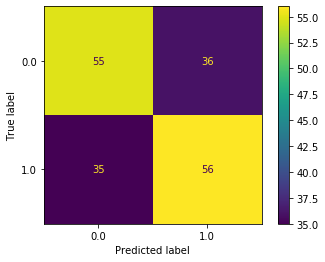

In [18]:

clf_LR = LR()
clf_LR.fit( train_input_scaled, train_target)
plot_confusion_matrix( clf_LR, 
                      valid_input_scaled, 
                      valid_target,
                      values_format = "d"
)

clf_LR.score( train_input_scaled, train_target)


In [19]:
55/(55+35), 56/(36+56), 

(0.6111111111111112, 0.6086956521739131)

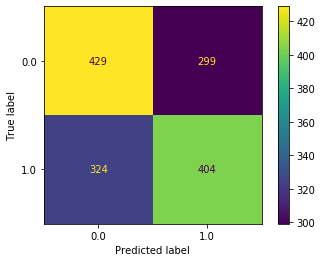

In [20]:
plot_confusion_matrix( clf_LR, 
                      train_input_scaled, 
                      train_target,
                      values_format = "d"
)

In [21]:
429/(429+324), 404/(404+299)

(0.5697211155378487, 0.5746799431009957)

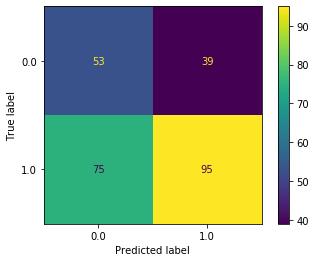

In [22]:
plot_confusion_matrix( clf_LR, 
                      test_input_scaled, 
                      test_target,
                      values_format = "d"
)

In [23]:
53/(53+75), 95/(95+39)

(0.4140625, 0.7089552238805971)

In [24]:
clf_LR.predict_proba(train_input_scaled)+0.001

array([[0.5034474 , 0.4985526 ],
       [0.40810604, 0.59389396],
       [0.58294797, 0.41905203],
       ...,
       [0.38997756, 0.61202244],
       [0.37741954, 0.62458046],
       [0.5802315 , 0.4217685 ]])

### Cross Validation For LRC

In [25]:

param_grid = [ 
    {"C" : np.logspace(0,1,20),
     "penalty" : ["l1", "l2", "elasticnet", "none"],
     "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
     "max_iter" : [100, 1000, 2500, 5000]
    }
]


optimal_params = GridSearchCV( 
    LR(),
    param_grid,
    cv = 5,
    scoring = "accuracy",
    verbose = 0

)

#optimal_params.fit(train_input_scaled, train_target)
#optimal_params.best_params_

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


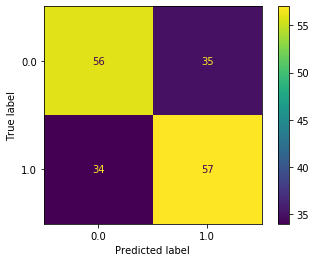

In [26]:
#Valid Data Evaluation
classifier = LR(C = 1.0, max_iter = 1000, penalty = "l1", solver = "liblinear")
classifier.fit( train_input_scaled, train_target )
plot_confusion_matrix( classifier, 
                      valid_input_scaled, 
                      valid_target,
                      values_format = "d"
)

In [27]:
56/(56+34), 57/(35+57)

(0.6222222222222222, 0.6195652173913043)

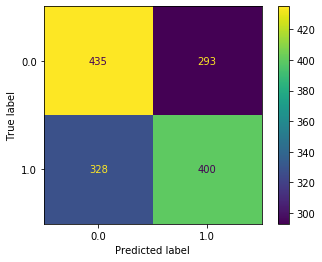

In [28]:
#Train Data Evaluation
plot_confusion_matrix( classifier, 
                      train_input_scaled, 
                      train_target,
                      values_format = "d"
)

In [29]:
435/(328+435), 400/(400+293), 

(0.5701179554390564, 0.5772005772005772)

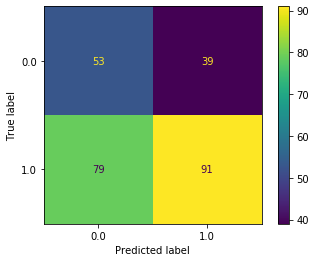

In [30]:
#Test Data Evaluation
plot_confusion_matrix( classifier, 
                      test_input_scaled, 
                      test_target,
                      values_format = "d"
)

In [31]:
53/(79+53), 91/(39+91)

(0.4015151515151515, 0.7)

In [32]:
#dump( clf_LR,open("most_acc_logistic_classifier", "wb"))
#dump( classifier,open("cv_logistic_classifier", "wb"))

### SUPPORT VECTOR CLASSIFIER

In [33]:
clf_svm = SVC( random_state = 42, probability =True )
clf_svm.fit( train_input_scaled, train_target )


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(probability=True, random_state=42)

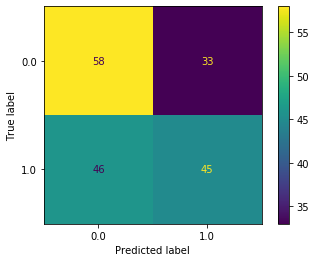

In [34]:
plot_confusion_matrix( clf_svm, 
                      valid_input_scaled, 
                      valid_target,
                      values_format = "d"
)

In [35]:
58/(46+58), 45/(33+45)

(0.5576923076923077, 0.5769230769230769)

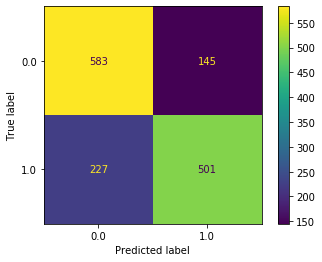

In [36]:
plot_confusion_matrix( clf_svm, 
                      train_input_scaled, 
                      train_target,
                      values_format = "d"
)

In [37]:
583/(583+227), 501/(501+145) 

(0.7197530864197531, 0.7755417956656346)

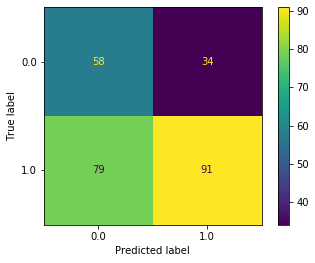

In [38]:
plot_confusion_matrix( clf_svm, 
                      test_input_scaled, 
                      test_target,
                      values_format = "d"
)


In [39]:
58/(58+79), 91/(34+91)

(0.4233576642335766, 0.728)

<Figure size 7200x5040 with 0 Axes>

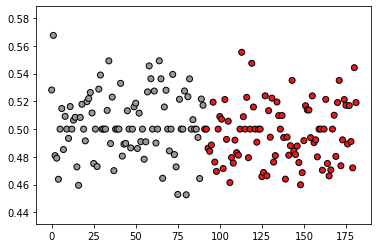

<Figure size 7200x5040 with 0 Axes>

In [68]:
ensemble_prob_valid = clf_svm.predict_proba(valid_input_scaled)[:,1]
plt.scatter(np.arange(ensemble_prob_valid.shape[0]), ensemble_prob_valid, c=valid_target.reshape(-1), cmap=plt.cm.Set1,
            edgecolor='k')
plt.figure(2, figsize=(100, 70))

### Cross Validation For Support Vector Classifier

In [40]:
param_grid = [ 
    {"C" : [0.5, 1, 10, 100],
    "gamma" : ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
    "kernel" : ["rbf"]}
]

optimal_params = GridSearchCV( 
    SVC(),
    param_grid,
    cv = 5,
    scoring = "accuracy",
    verbose = 0

)

#optimal_params.fit(train_input_scaled, train_target)
#optimal_params.best_params_

In [41]:
svm_cv = SVC(random_state = 42, C = 1, gamma = 0.001, 
probability = True)

svm_cv.fit(train_input_scaled, train_target)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=1, gamma=0.001, probability=True, random_state=42)

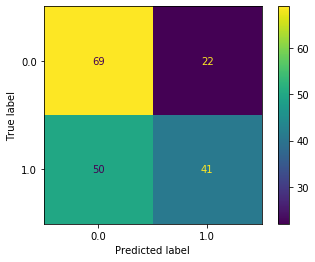

In [42]:
plot_confusion_matrix( svm_cv, 
                      valid_input_scaled, 
                      valid_target,
                      values_format = "d"
)

In [43]:
#Valid Data Evaluation
69/(69+50), 41/(22+41), 

(0.5798319327731093, 0.6507936507936508)

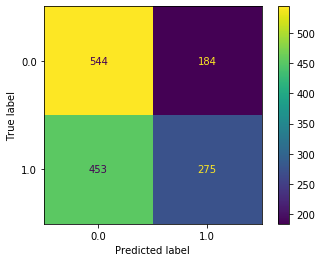

In [44]:
plot_confusion_matrix( svm_cv, 
                      train_input_scaled, 
                      train_target,
                      values_format = "d"
)

In [45]:
#Train Data Evaluation
544/(544+453), 275/(275+184)

(0.5456369107321966, 0.599128540305011)

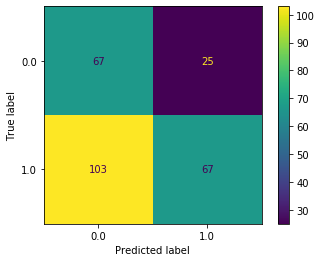

In [46]:
plot_confusion_matrix( svm_cv, 
                      test_input_scaled, 
                      test_target,
                      values_format = "d"
)

In [47]:
#Test Data Evaluation
67/(67+103), 67/(25+67)

(0.3941176470588235, 0.7282608695652174)

#### Note= Result of cross validation states that SVC with defult hyper parametter setting, provides better results. 

In [48]:
#dump( clf_svm,open("most_acc_sv_classifier", "wb"))

In [49]:
#dump( svm_cv,open("svm_zero_classifier", "wb"))

## GAUSSIAN NAIVE BAYES CLASSIFIER

In [50]:
gnb =  GaussianNB()
gnb.fit(train_input_scaled, train_target)
gnb.predict_proba(train_input_scaled)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[0.74333061, 0.25666939],
       [0.45065236, 0.54934764],
       [0.82385059, 0.17614941],
       ...,
       [0.0016206 , 0.9983794 ],
       [0.04523146, 0.95476854],
       [0.82572718, 0.17427282]])

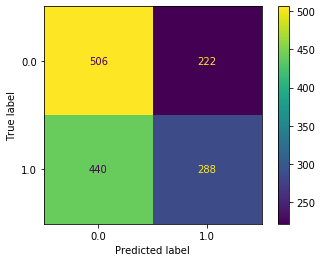

In [51]:
plot_confusion_matrix( gnb, 
                      train_input_scaled, 
                      train_target,
                      values_format = "d"
)


In [52]:
506/(440+506), 288/(288+222)

(0.5348837209302325, 0.5647058823529412)

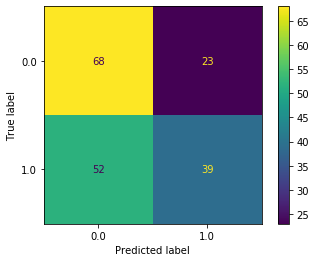

In [53]:
#Validation Set Evaluation
plot_confusion_matrix( gnb, 
                      valid_input_scaled, 
                      valid_target,
                      values_format = "d"
)


In [54]:
68/(52+68), 39/(23+39)

(0.5666666666666667, 0.6290322580645161)

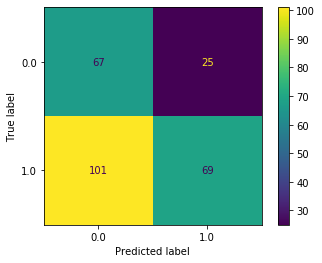

In [55]:
#Test Set Evaluation

plot_confusion_matrix( gnb, 
                      test_input_scaled, 
                      test_target,
                      values_format = "d"
)


In [56]:
67/(101+67), 69/(25+69)

(0.39880952380952384, 0.7340425531914894)

In [66]:
#dump( gnb,open("most_acc_nb_classifier", "wb"))
valid_target.reshape(-1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<Figure size 7200x5040 with 0 Axes>

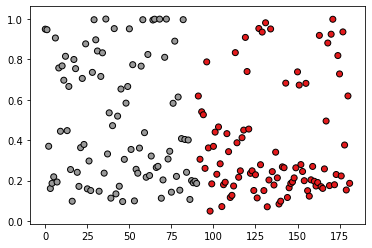

<Figure size 7200x5040 with 0 Axes>

In [67]:
gnb_prob_valid = gnb.predict_proba(valid_input_scaled)[:,1]
plt.scatter(np.arange(gnb_prob_valid.shape[0]), gnb_prob_valid, c=valid_target.reshape(-1), cmap=plt.cm.Set1,
            edgecolor='k')
plt.figure(2, figsize=(100, 70))

## Random Forrest Classifier

In [12]:
random_clf =  RandomForestClassifier(n_estimators= 100, max_features="sqrt", random_state=42)
random_clf.fit(train_input_scaled, train_target)
train_score = random_clf.score(train_input_scaled, train_target)
valid_score = random_clf.score(valid_input_scaled, valid_target)
test_score = random_clf.score(test_input_scaled, test_target)

print(f"Train Score = {train_score},Validation Score = {valid_score}, Test Score = {test_score} ")

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train Score = 1.0,Validation Score = 0.5989010989010989, Test Score = 0.5648854961832062 


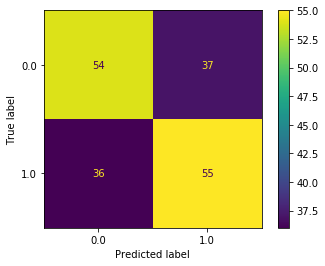

In [13]:
plot_confusion_matrix( random_clf, 
                      valid_input_scaled, 
                      valid_target,
                      values_format = "d"
)


In [14]:
57/(57+36), 55/(37+55)

(0.6129032258064516, 0.5978260869565217)

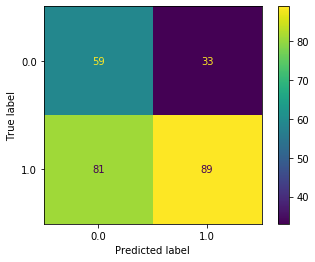

In [15]:
plot_confusion_matrix( random_clf, 
                      test_input_scaled, 
                      test_target,
                      values_format = "d"
)


In [16]:
59/(52+81), 89/(33+89)

(0.44360902255639095, 0.7295081967213115)

In [82]:
#dump( random_clf,open("most_acc_rforrest_classifier", "wb"))

<Figure size 7200x5040 with 0 Axes>

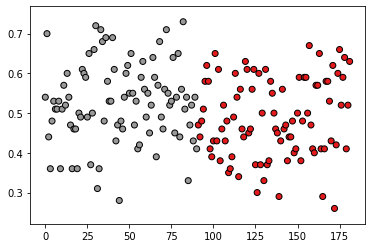

<Figure size 7200x5040 with 0 Axes>

In [17]:
ensemble_prob_valid = random_clf.predict_proba(valid_input_scaled)[:,1]
plt.scatter(np.arange(ensemble_prob_valid.shape[0]), ensemble_prob_valid, c=valid_target.reshape(-1), cmap=plt.cm.Set1,
            edgecolor='k')
plt.figure(2, figsize=(100, 70))